## Operations done on different df's
df_cleaned - cleaned>scaled

df3 - cleaned> train-test split> scaled>  NearMiss Undersample

df4 - cleaned> train-test split> scaled>  SMOTE Oversample

## EDA on Different Variations of  Dataset

In [1]:
#Import relevant Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()

In [2]:
# Let's start with the cleaned df without oversampled or undersampled data
df = pd.read_csv("df_scaled_inputs.csv")

In [3]:
df.head()

aluminium   ammonia   arsenic    barium   cadmium  chloramine  chromium  \
0   0.777403 -0.585491 -0.480875  1.054205 -0.993241   -0.711941  2.152993   
1   1.306945  0.775118 -0.599632  1.432447 -1.131948    1.208552  1.598765   
2   0.271572 -0.029083 -0.480875 -0.812340 -0.965499    0.803417  1.044536   
3   0.548198 -0.332067 -0.480875  1.144654 -1.159690    1.968179 -0.802892   
4   0.200439  1.132165 -0.520460 -1.124801 -1.020982    0.191820  1.635713   

     copper  flouride  bacteria  ...      lead  nitrates  nitrites   mercury  \
0 -0.973050 -1.657446 -0.363345  ... -0.781070  1.129767 -0.348629  0.609178   
1 -0.223303  0.294799  1.002460  ...  0.009785 -1.409197  1.046960 -0.739005   
2 -1.202564  0.501507 -0.818614  ... -0.368450  0.783298 -0.383518  0.272132   
3  1.306793  0.708215  1.184567  ... -1.434385 -1.517469 -0.069511 -0.401960   
4 -0.361012 -0.371261 -0.575804  ...  0.302058 -0.555658 -0.383518 -0.739005   

   perchlorate    radium  selenium    silver   uranium  is_safe  
0     1.203362  1.661842  1.053694  1.338736 -0.917040        1  
1     0.892977  0.124811  1.053694  0.851134  0.198023        1  
2     1.911763  1.786699  0.706129  2.035310 -1.288728        0  
3    -0.415275 -0.516695 -1.031700  2.104968  0.198023        1  
4     0.024578 -0.219622 -1.031700 -0.611672 -0.917040        1  

[5 rows x 21 columns]

In [4]:
df.describe(include="all").transpose()

count          mean       std       min       25%       50%  \
aluminium    7996.0 -2.852480e-14  1.000063 -0.526693 -0.495079 -0.471368   
ammonia      7996.0 -2.844148e-16  1.000063 -1.617212 -0.867356 -0.016694   
arsenic      7996.0 -3.571902e-15  1.000063 -0.639217 -0.520460 -0.441289   
barium       7996.0  7.423332e-16  1.000063 -1.289254 -0.828785 -0.310757   
cadmium      7996.0 -1.105343e-15  1.000063 -1.187431 -0.965499 -0.077771   
chloramine   7996.0  3.124342e-16  1.000063 -0.848285 -0.809330 -0.641822   
chromium     7996.0 -1.908484e-15  1.000063 -0.913738 -0.728995 -0.581200   
copper       7996.0 -2.571174e-16  1.000063 -1.233166 -1.095458 -0.085594   
flouride     7996.0  1.188672e-16  1.000063 -1.772284 -0.836355 -0.003780   
bacteria     7996.0 -1.425934e-15  1.000063 -0.970370 -0.970370 -0.302643   
viruses      7996.0 -9.988397e-16  1.000063 -0.869387 -0.864097 -0.848228   
lead         7996.0  1.699491e-16  1.000063 -1.709466 -0.884225  0.044170   
nitrates     7996.0  1.051352e-16  1.000063 -1.771906 -0.869645  0.019985   
nitrites     7996.0  6.600662e-16  1.000063 -2.319897 -0.575412  0.157272   
mercury      7996.0 -1.081898e-16  1.000063 -1.750143 -0.739005 -0.064914   
perchlorate  7996.0 -2.085764e-16  1.000063 -0.930887 -0.808203 -0.493012   
radium       7996.0  1.448927e-15  1.000063 -1.257225 -0.904182 -0.219622   
selenium     7996.0  1.943862e-18  1.000063 -1.726831 -1.031700  0.010997   
silver       7996.0 -1.766054e-15  1.000063 -1.029616 -0.750986 -0.472357   
uranium      7996.0 -8.811597e-17  1.000063 -1.660415 -0.917040  0.198023   
is_safe      7996.0  1.140570e-01  0.317900  0.000000  0.000000  0.000000   

                  75%       max  
aluminium   -0.305392  3.464632  
ammonia      0.884654  1.752774  
arsenic     -0.243361  3.517278  
barium       0.752022  2.772741  
cadmium      0.754475  2.418966  
chloramine   0.803417  2.533030  
chromium     0.711999  2.411633  
copper       0.893667  1.827026  
flouride     0.891956  1.672854  
bacteria     0.881055  2.064753  
viruses      0.982026  1.775489  
lead         0.886603  1.729036  
nitrates     0.864502  1.806463  
nitrites     0.750397  2.791445  
mercury      0.946224  1.620315  
perchlorate  0.736230  2.461862  
radium       0.753401  2.182796  
selenium     0.706129  1.748826  
silver       0.642162  2.453255  
uranium      0.941398  1.684773  
is_safe      0.000000  1.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7996 entries, 0 to 7995
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [6]:
def skew_count(df):
    dict_unicount = {}
    for i in list(df.columns):
        dict_unicount[i] = df[i].value_counts().shape[0]

    df_unique_count = pd.DataFrame(dict_unicount,index=["unique count"]).transpose()

    dict_skew = {}
    for i in list(df.columns):
        dict_skew[i] = df[i].skew()
    df_skew = pd.DataFrame(dict_skew,index=["skew"]).transpose()
    return(df_skew.join(df_unique_count))
skew_count(df)

skew  unique count
aluminium    2.013463           495
ammonia      0.026804          2563
arsenic      1.985241           107
barium       0.660957           480
cadmium      0.478226            23
chloramine   0.888123           812
chromium     1.028188            91
copper       0.253558           201
flouride    -0.039733           151
bacteria     0.554417           101
viruses      0.424567            61
lead        -0.060601           200
nitrates    -0.042060          1803
nitrites    -0.498212           280
mercury     -0.081726            11
perchlorate  0.937767          2999
radium       0.548391           735
selenium     0.010495            11
silver       1.029489            51
uranium     -0.027040            10
is_safe      2.428682             2

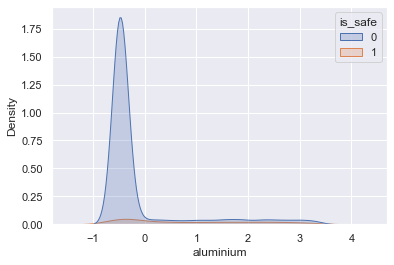

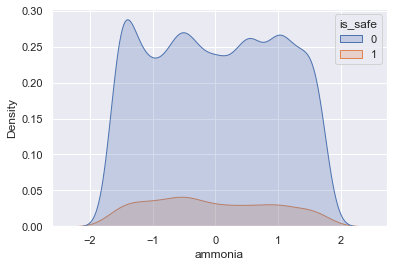

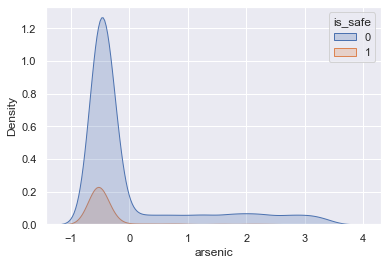

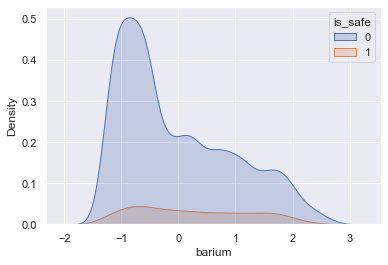

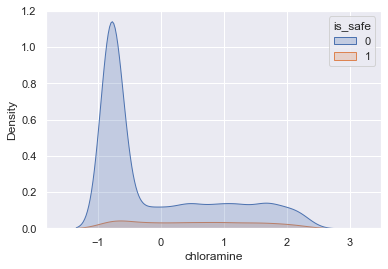

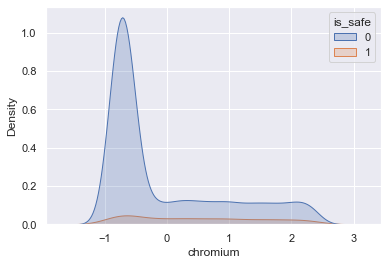

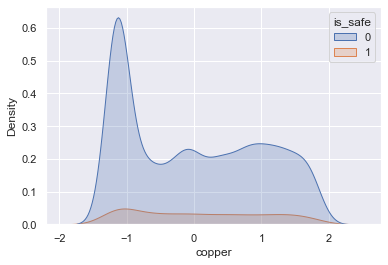

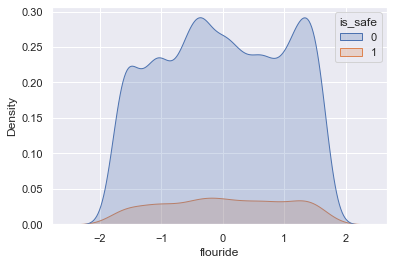

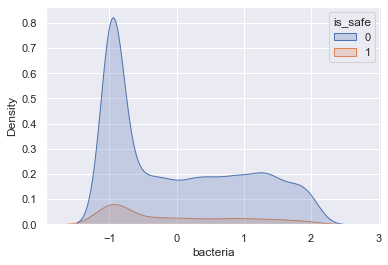

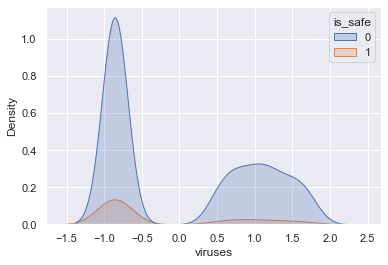

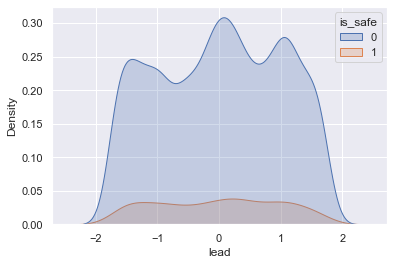

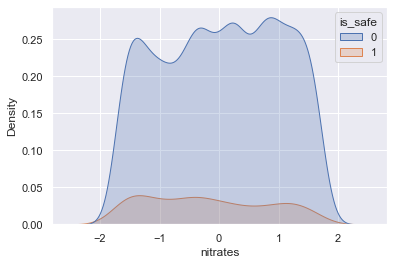

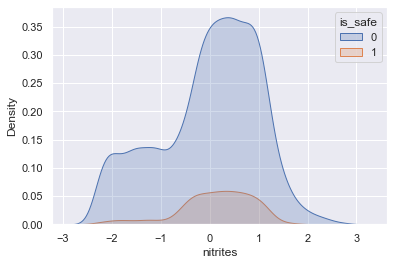

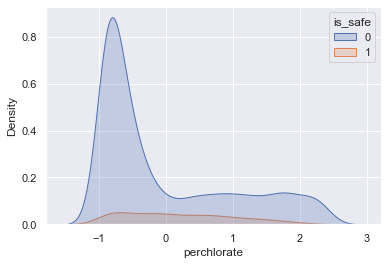

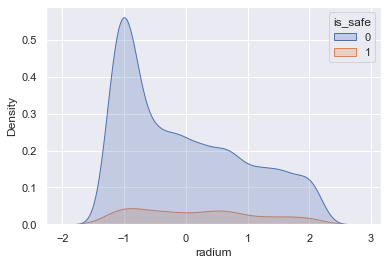

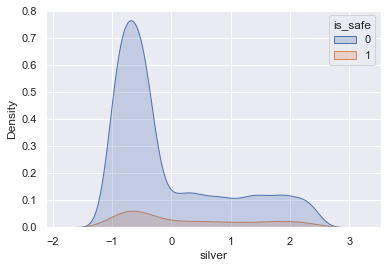

In [7]:
def kdeplots(df,y):
    for i in range(len(df.columns)):
        if len(df[df.columns[i]].unique())>50:
            sns.kdeplot(df[df.columns[i]],shade=True,hue=y)
            plt.show()
kdeplots(df,df["is_safe"])

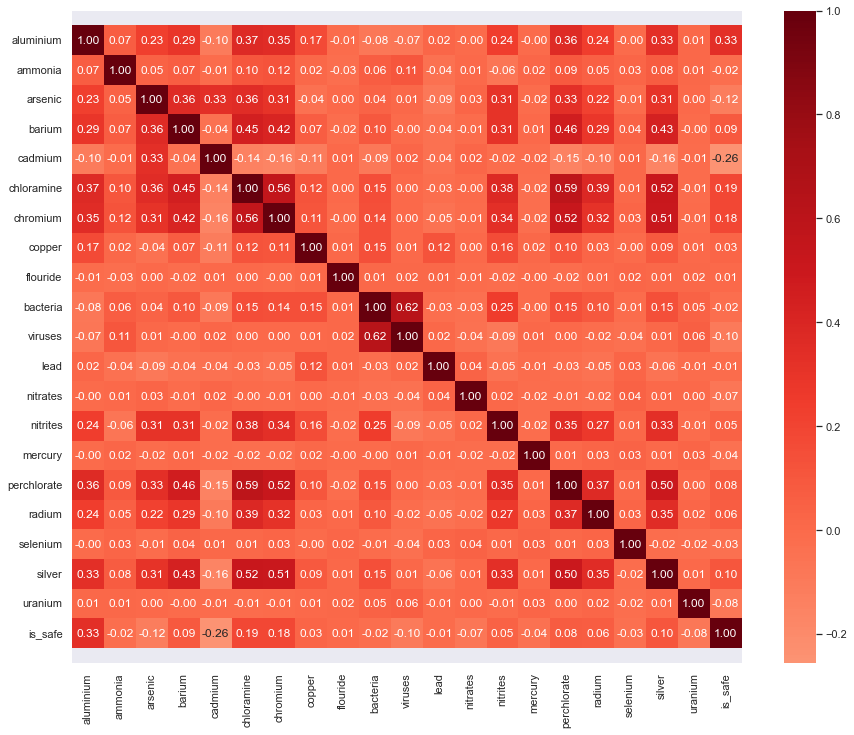

In [8]:
def heatmaps(df):
    fig, ax = plt.subplots(figsize=(15,12))
    sns.heatmap(df.corr(), center=0, cmap='Reds',annot=True, fmt=".2f")
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    # ax.set_title("Factors affecting left")
heatmaps(df)

In [9]:
# Correlation tells relation between two attributes.
# Correlation requires continous df. 

#sets the number of features considered
size = len(df.columns)

#create a dfframe with only 'size' features
# df=dfset.iloc[:,:size] 

#get the names of all the columns
cols=df.columns 

# Calculates pearson co-efficient for all combinations
df_corr = df.corr()

# Set the threshold to select only only highly correlated attributes
threshold = 0.5

# List of pairs along with correlation above threshold
corr_list = []

#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (abs(df_corr.iloc[i,j] )>= threshold and abs(df_corr.iloc[i,j]) < 1):
            corr_list.append([df_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

# Strong correlation is observed between the following pairs
# This represents an opportunity to reduce the feature set through transformations such as PCA

bacteria and viruses = 0.62
chloramine and perchlorate = 0.59
chloramine and chromium = 0.56
chromium and perchlorate = 0.52
chloramine and silver = 0.52
chromium and silver = 0.51
perchlorate and silver = 0.50


In [10]:
class corplotsss():
    
        
    def high_corr(self,df):
        self.df = df
    
        # Correlation tells relation between two attributes.
        # Correlation requires continous self.df. 

        #sets the number of features considered
        size = len(self.df.columns)

        #create a self.dfframe with only 'size' features
        # self.df=self.dfset.iloc[:,:size] 

        #get the names of all the columns
        self.cols=self.df.columns 

        # Calculates pearson co-efficient for all combinations
        self.df_corr = self.df.corr()

        # Set the threshold to select only only highly correlated attributes
        threshold = 0.5

        # List of pairs along with correlation above threshold
        corr_list = []

        #Search for the highly correlated pairs
        for i in range(0,size): #for 'size' features
            for j in range(i+1,size): #avoid repetition
                if (abs(self.df_corr.iloc[i,j] )>= threshold and abs(self.df_corr.iloc[i,j]) < 1):
                    corr_list.append([self.df_corr.iloc[i,j],i,j]) #store correlation and columns index

        #Sort to show higher ones first            
        s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))
        self.s_corr_list = s_corr_list
        #Print correlations and column names
        for v,i,j in s_corr_list:
            print ("%s and %s = %.2f" % (self.cols[i],self.cols[j],v))
    

        # Strong correlation is observed between the following pairs
        # This represents an opportunity to reduce the feature set through transformations such as PCA
        
    def high_corr_plot(self):
        for v,i,j in self.s_corr_list:
            sns.pairplot(df, hue="is_safe", height=6, x_vars=self.cols[i],y_vars=self.cols[j] )
            plt.show()

corplotss = corplotsss()
corplotss.high_corr(df)

bacteria and viruses = 0.62
chloramine and perchlorate = 0.59
chloramine and chromium = 0.56
chromium and perchlorate = 0.52
chloramine and silver = 0.52
chromium and silver = 0.51
perchlorate and silver = 0.50


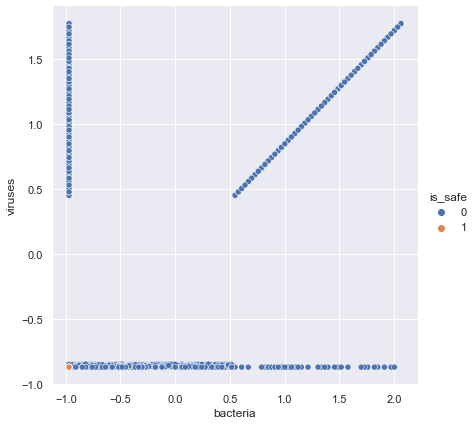

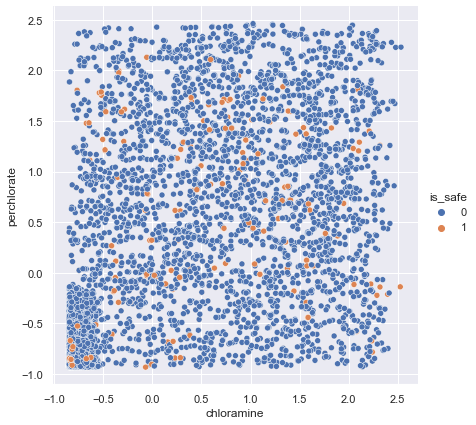

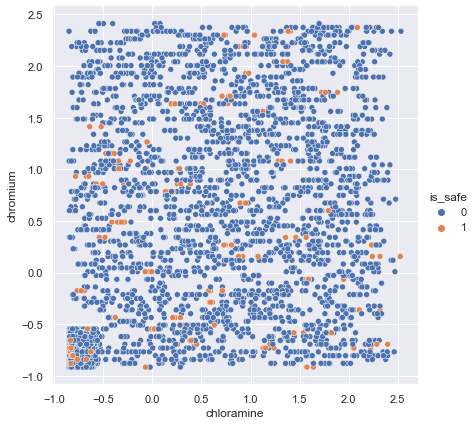

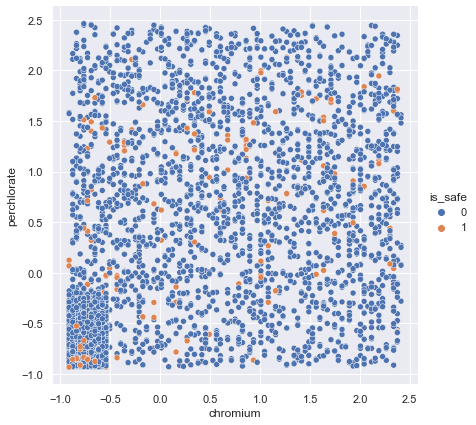

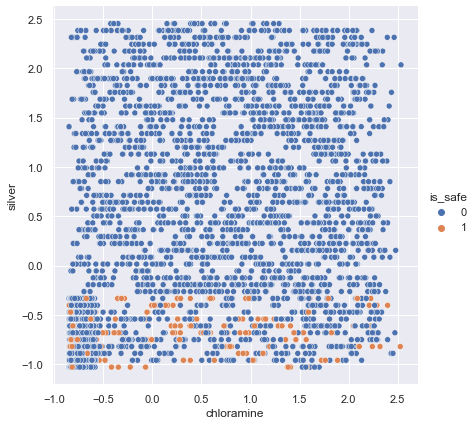

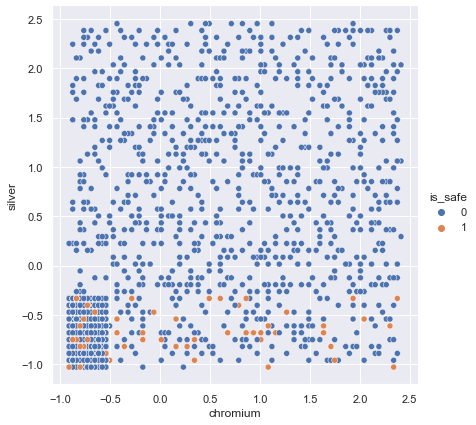

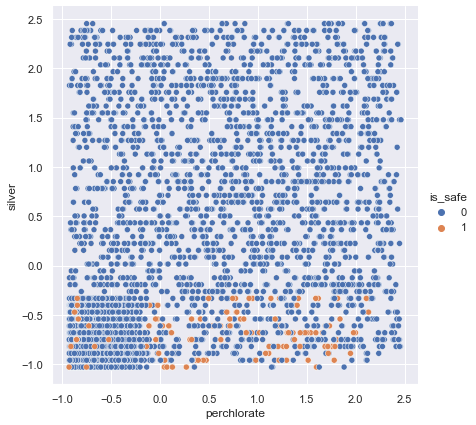

In [11]:
corplotss.high_corr_plot()

In [12]:
# for j in range(0, len(features), 4):  
#     for i, item in enumerate(features[j:j+4],1):
#         plt.subplot(2, 2, i)
#         sns.scatterplot(data=df,x=item, y=item,hue="is_safe")
#     plt.show()

### Do for other df's

In [45]:
df3 = pd.read_csv("df_3.csv")
df4 = pd.read_csv("df_4.csv")

In [46]:
df3.describe(include="all").transpose()

count      mean       std       min       25%       50%  \
aluminium    1408.0  0.248388  1.147111 -0.525721 -0.486332 -0.454822   
ammonia      1408.0 -0.082658  0.953042 -1.615485 -0.878223 -0.189924   
arsenic      1408.0 -0.397849  0.456404 -0.639590 -0.559848 -0.480106   
barium       1408.0 -0.092224  0.946261 -1.286252 -0.841551 -0.438026   
cadmium      1408.0 -0.395707  0.873151 -1.188960 -1.056903 -0.938746   
chloramine   1408.0  0.073478  1.001505 -0.841595 -0.790739 -0.495385   
chromium     1408.0  0.069476  1.007772 -0.908475 -0.723286 -0.538097   
copper       1408.0 -0.228099  0.951226 -1.231161 -1.108995 -0.505802   
flouride     1408.0  0.002884  0.947394 -1.743037 -0.756228  0.001091   
bacteria     1408.0 -0.273615  0.902943 -0.971987 -0.971987 -0.790733   
viruses      1408.0 -0.377892  0.844101 -0.878308 -0.875666 -0.865099   
lead         1408.0 -0.003616  0.946150 -1.695479 -0.821594  0.052292   
nitrates     1408.0 -0.178950  0.958866 -1.787657 -1.021205 -0.228495   
nitrites     1408.0 -0.302342  0.973140 -2.319665 -1.063226 -0.155797   
mercury      1408.0 -0.107787  0.982752 -1.748485 -1.074101 -0.062525   
perchlorate  1408.0 -0.148860  0.770031 -0.923227 -0.778204 -0.449070   
radium       1408.0 -0.110259  0.942070 -1.255336 -0.927493 -0.330042   
selenium     1408.0 -0.108918  0.964384 -1.725306 -1.027613  0.018926   
silver       1408.0 -0.015736  0.996087 -1.026270 -0.746872 -0.467475   
uranium      1408.0 -0.144971  0.971151 -1.658623 -0.915519 -0.172415   
is_safe      1408.0  0.500000  0.500178  0.000000  0.000000  0.500000   

                  75%       max  
aluminium    0.815442  3.413082  
ammonia      0.704640  1.739902  
arsenic     -0.400364  3.347505  
barium       0.585198  2.444294  
cadmium      0.201118  2.425244  
chloramine   0.891412  2.546179  
chromium     0.804525  2.424929  
copper       0.524970  1.807708  
flouride     0.758409  1.676371  
bacteria     0.304349  2.048928  
viruses      0.468936  1.763347  
lead         0.771962  1.714388  
nitrates     0.631671  1.787008  
nitrites     0.472423  2.444335  
mercury      0.611859  1.623435  
perchlorate  0.341051  2.460456  
radium       0.560743  2.165449  
selenium     0.716618  1.763157  
silver       0.580265  2.466197  
uranium      0.570689  1.685345  
is_safe      1.000000  1.000000

In [47]:
skew_count(df3)

skew  unique count
aluminium    1.350657           343
ammonia      0.175528           979
arsenic      5.079606            63
barium       0.751519           364
cadmium      1.013298            23
chloramine   0.764442           472
chromium     0.914940            91
copper       0.633235           191
flouride    -0.042218           148
bacteria     1.082860            99
viruses      1.267461            59
lead        -0.078599           198
nitrates     0.124585           763
nitrites    -0.337791           212
mercury      0.069036            11
perchlorate  1.017624           953
radium       0.719122           522
selenium     0.098214            11
silver       1.099446            51
uranium      0.176551            10
is_safe      0.000000             2

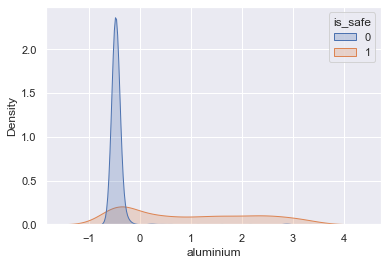

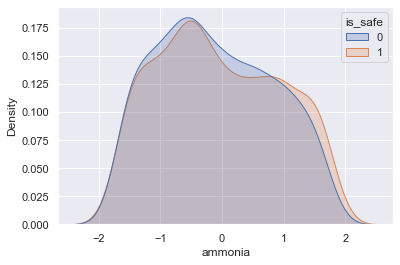

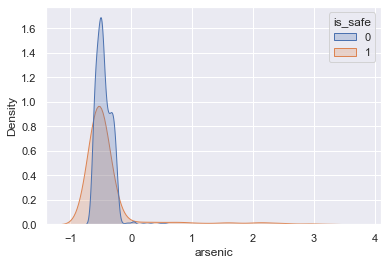

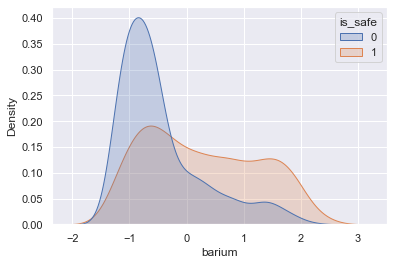

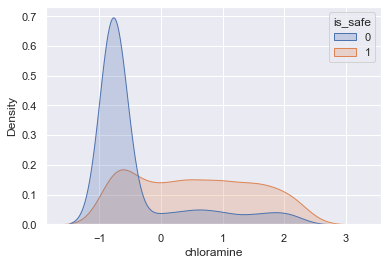

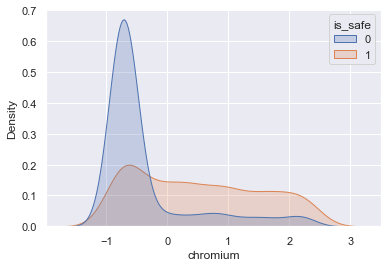

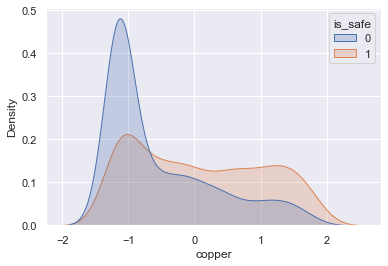

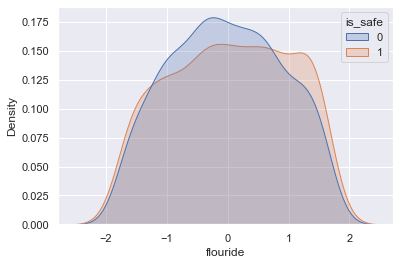

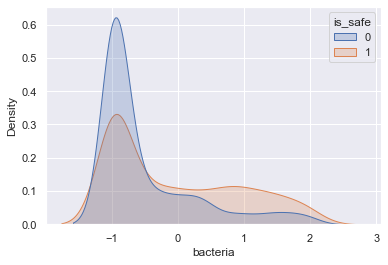

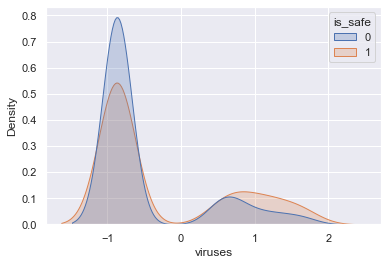

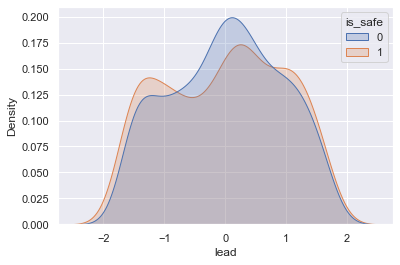

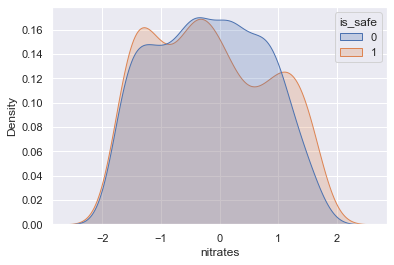

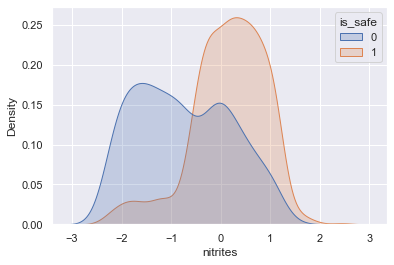

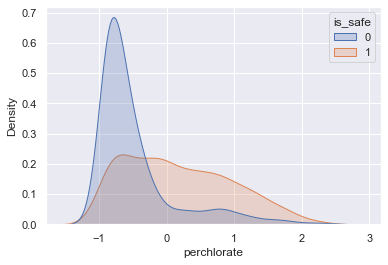

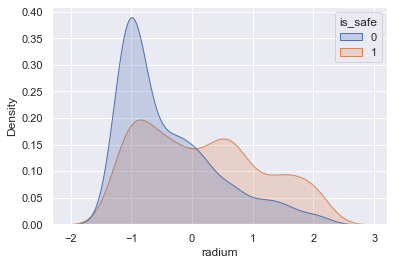

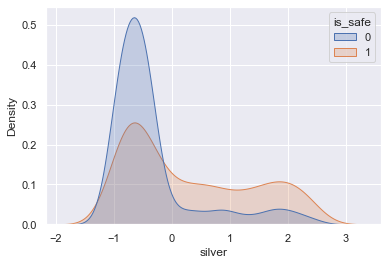

In [48]:
kdeplots(df3,df3["is_safe"])

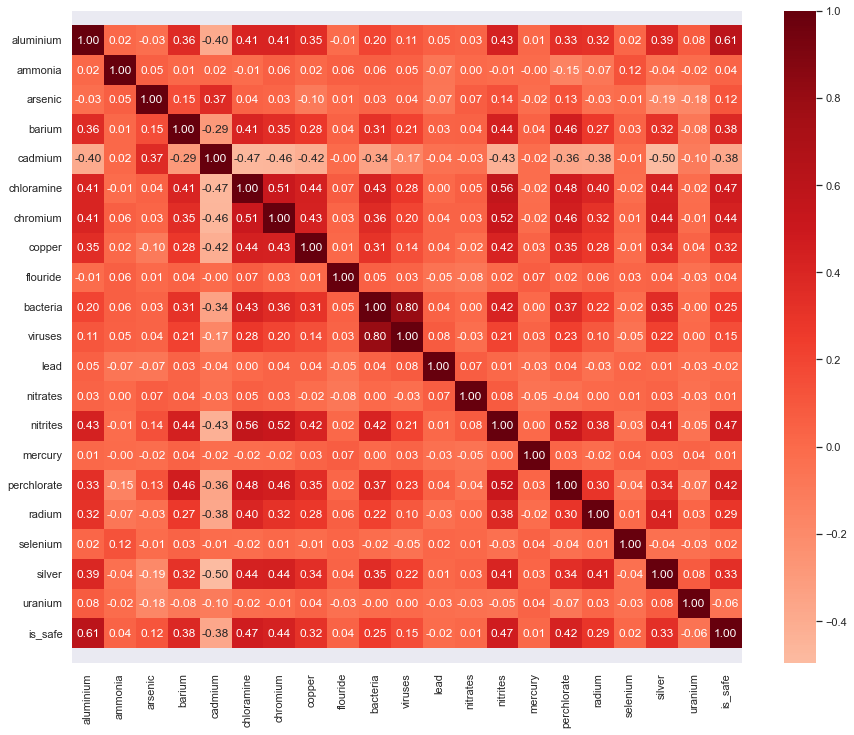

In [49]:
heatmaps(df3)

bacteria and viruses = 0.80
aluminium and is_safe = 0.61
chloramine and nitrites = 0.56
chromium and nitrites = 0.52
nitrites and perchlorate = 0.52
chloramine and chromium = 0.51


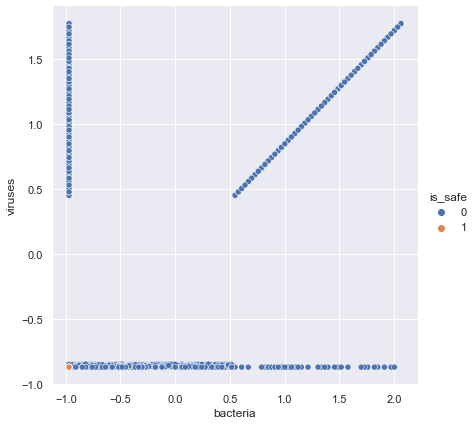

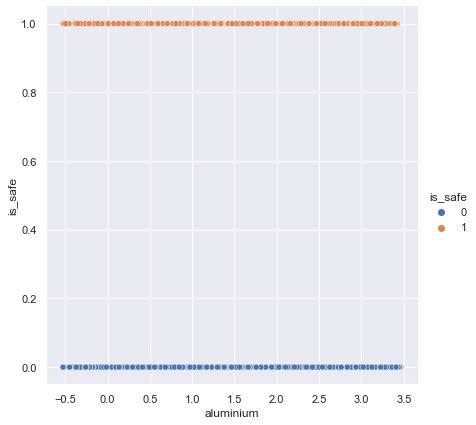

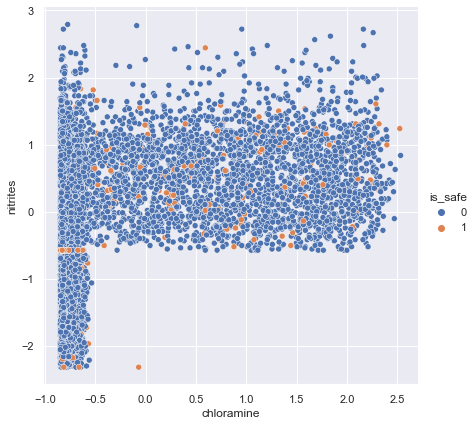

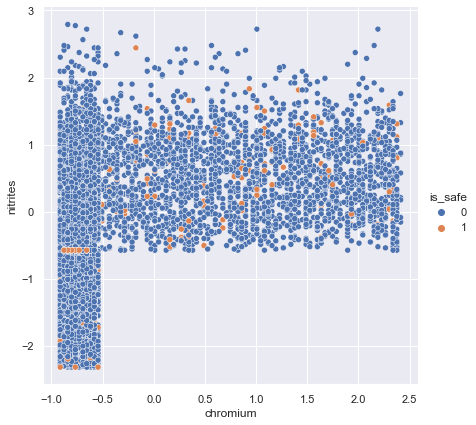

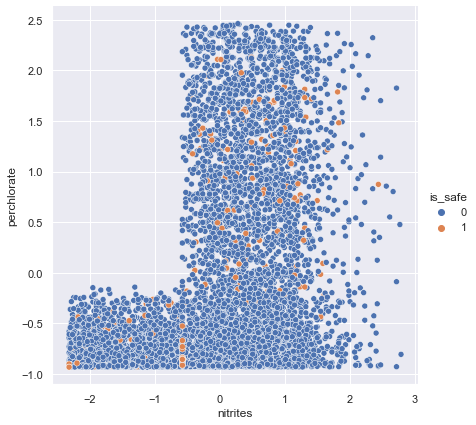

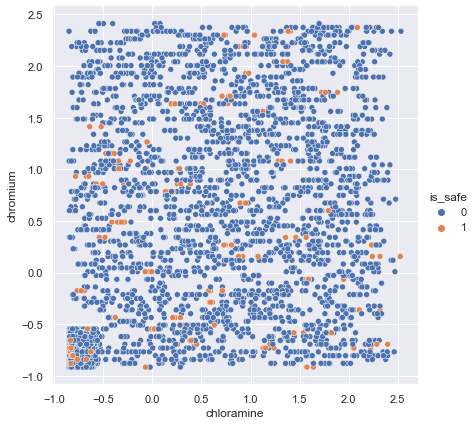

In [50]:
corplots3 = corplotsss()
corplots3.high_corr(df3)
corplots3.high_corr_plot()

In [51]:
df4.describe(include="all").transpose()

count      mean       std       min       25%       50%  \
aluminium    11384.0  0.415880  1.187107 -0.525721 -0.481773 -0.362294   
ammonia      11384.0 -0.021054  0.953422 -1.623364 -0.815190 -0.069686   
arsenic      11384.0 -0.162037  0.854799 -0.639590 -0.559848 -0.480106   
barium       11384.0  0.101825  0.962475 -1.286252 -0.718023 -0.084107   
cadmium      11384.0 -0.328478  0.959870 -1.188960 -1.061829 -0.910945   
chloramine   11384.0  0.232070  0.984549 -0.841595 -0.747707  0.050732   
chromium     11384.0  0.209432  1.003554 -0.908475 -0.686248 -0.130681   
copper       11384.0  0.033071  0.951709 -1.231161 -0.927374 -0.055317   
flouride     11384.0  0.021160  0.949594 -1.765986 -0.733279  0.025703   
bacteria     11384.0 -0.027586  0.969096 -0.971987 -0.971987 -0.337595   
viruses      11384.0 -0.123136  0.959995 -0.878308 -0.873707 -0.861572   
lead         11384.0 -0.009266  0.952984 -1.695479 -0.838729  0.052292   
nitrates     11384.0 -0.076709  0.966939 -1.787657 -0.914816 -0.119842   
nitrites     11384.0  0.061442  0.879581 -2.319665 -0.319547  0.204904   
mercury      11384.0 -0.043348  0.962523 -1.748485 -0.808041 -0.062525   
perchlorate  11384.0  0.066249  0.883020 -0.923794 -0.710225 -0.177393   
radium       11384.0  0.076434  0.957732 -1.255336 -0.806709 -0.072906   
selenium     11384.0 -0.039913  0.965710 -1.725306 -0.900028  0.018926   
silver       11384.0  0.137860  1.014113 -1.026270 -0.677023 -0.327776   
uranium      11384.0 -0.083652  0.969025 -1.658623 -0.915519 -0.172415   
is_safe      11384.0  0.500000  0.500022  0.000000  0.000000  0.500000   

                  75%       max  
aluminium    1.306639  3.452470  
ammonia      0.806083  1.744405  
arsenic     -0.320622  3.546859  
barium       0.846665  2.748997  
cadmium      0.443368  2.425244  
chloramine   1.050791  2.554003  
chromium     1.017492  2.424929  
copper       0.876196  1.822979  
flouride     0.847698  1.676371  
bacteria     0.840562  2.048928  
viruses      0.838768  1.763347  
lead         0.772778  1.714388  
nitrates     0.753053  1.801495  
nitrites     0.677805  2.793346  
mercury      0.720741  1.623435  
perchlorate  0.683956  2.475752  
radium       0.788484  2.191331  
selenium     0.716618  1.763157  
silver       0.929511  2.466197  
uranium      0.718337  1.685345  
is_safe      1.000000  1.000000

In [52]:
skew_count(df4)

skew  unique count
aluminium    1.008963          5399
ammonia      0.088306          7321
arsenic      2.569788          4291
barium       0.488500          5401
cadmium      1.028728          4406
chloramine   0.474634          5714
chromium     0.634515          4659
copper       0.214855          4923
flouride    -0.066055          4801
bacteria     0.595433          3689
viruses      0.643042          3908
lead        -0.072728          4856
nitrates     0.067558          6628
nitrites    -0.716225          5134
mercury     -0.018779          3959
perchlorate  0.784607          7651
radium       0.452335          5466
selenium     0.046470          3913
silver       0.764258          4557
uranium      0.109101          3787
is_safe      0.000000             2

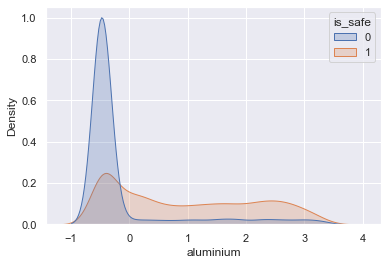

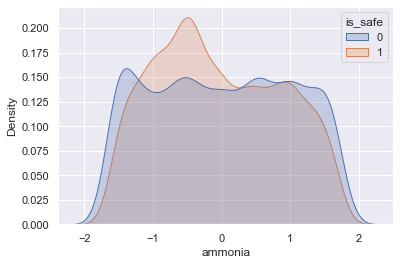

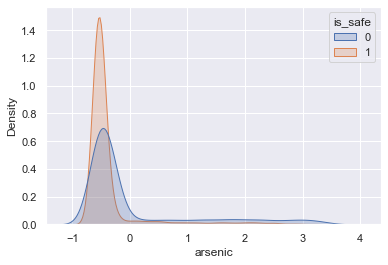

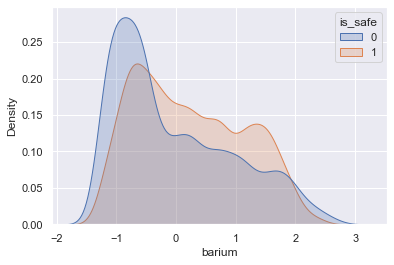

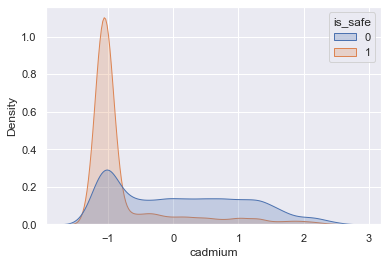

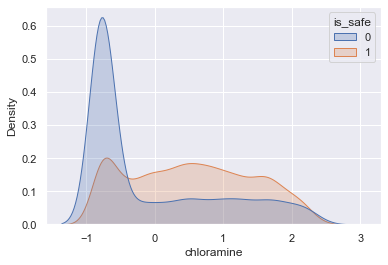

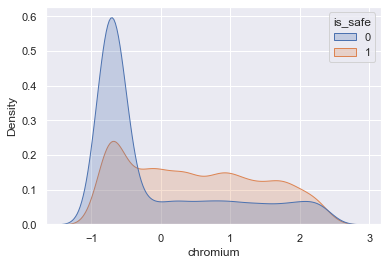

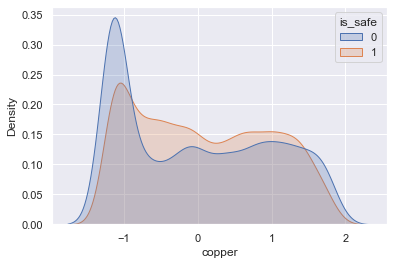

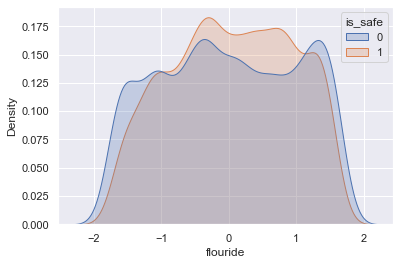

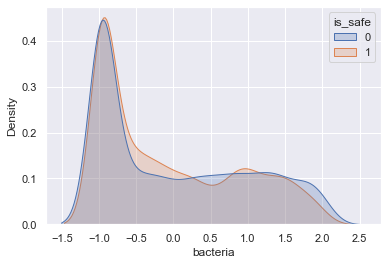

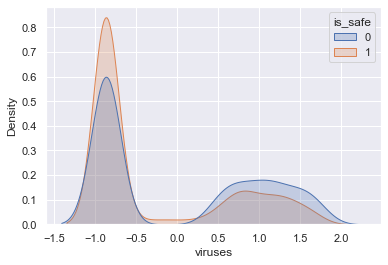

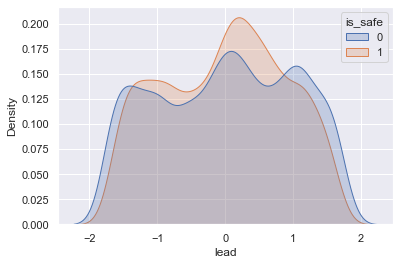

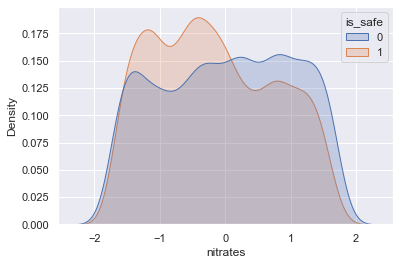

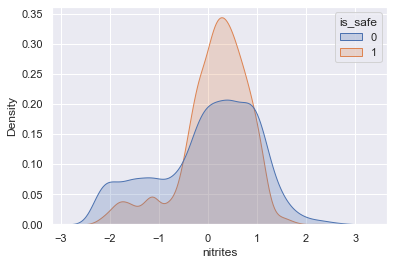

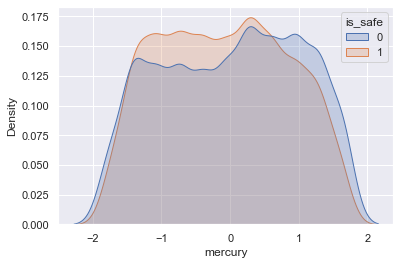

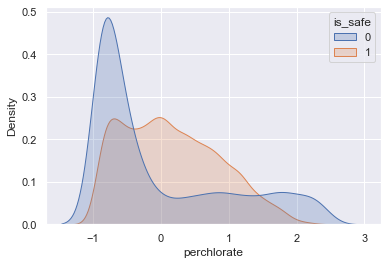

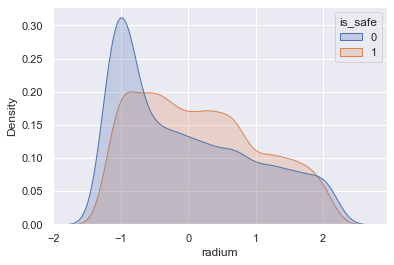

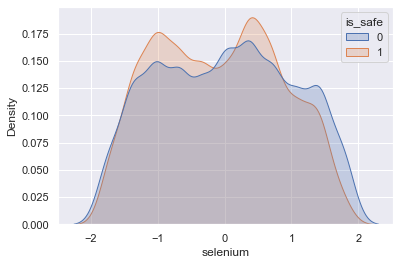

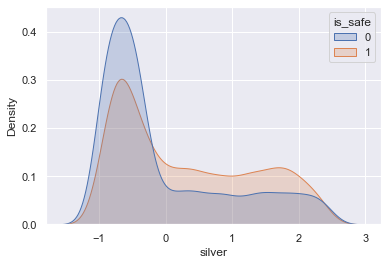

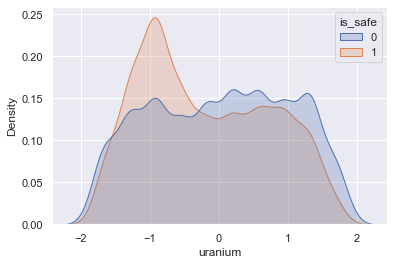

In [53]:
kdeplots(df4,df4["is_safe"])

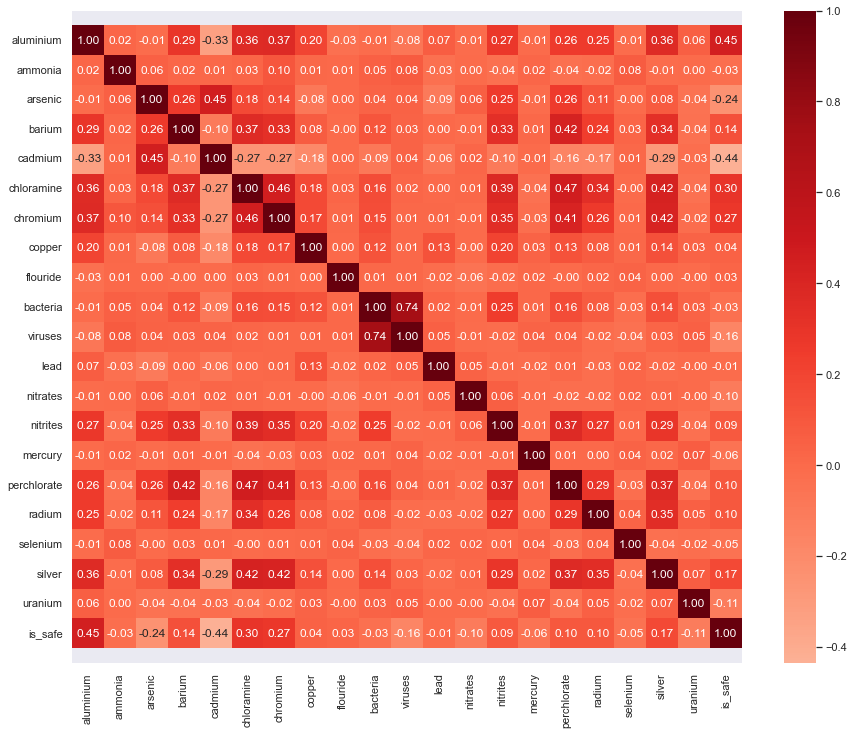

In [54]:
heatmaps(df4)

bacteria and viruses = 0.74


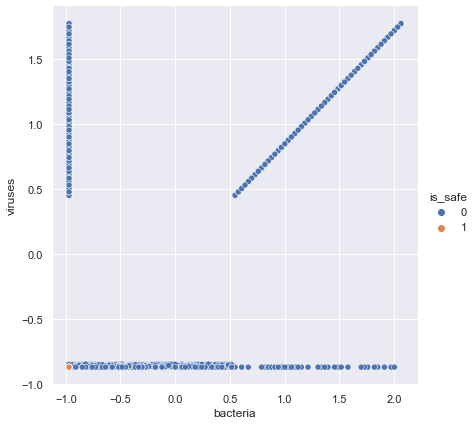

In [56]:
corplots4 = corplotsss()
corplots4.high_corr(df4)
corplots4.high_corr_plot()

In [57]:
df3

aluminium   ammonia   arsenic    barium   cadmium  chloramine  chromium  \
0     -0.462700  0.417333 -0.360493 -1.030961 -0.632929   -0.673380 -0.649210   
1     -0.297270 -0.067797 -0.559848 -0.858022 -0.994349    0.328087 -0.501059   
2     -0.517843 -0.447121 -0.360493 -0.858022 -0.910945   -0.818123 -0.575134   
3     -0.462700 -0.824194 -0.519977 -1.278017 -0.076898   -0.841595 -0.575134   
4     -0.454822  1.325685 -0.400364 -0.643906  0.201118   -0.829859 -0.612172   
...         ...       ...       ...       ...       ...         ...       ...   
1403   1.041923 -0.764538 -0.480106 -0.026266 -1.161159   -0.184382  0.387849   
1404   0.553511  0.634572 -0.559848  0.731372 -1.133357    1.552536  0.387849   
1405   2.239319 -1.513056 -0.440235 -1.022726 -1.049953   -0.063111  1.017492   
1406   3.074345  0.430840 -0.635602  0.171379 -1.161159    2.237133  0.424887   
1407   2.609566 -0.360451 -0.559848 -0.973314 -1.161159    1.967206 -0.649210   

        copper  flouride  bacteria  ...      lead  nitrates  nitrites  \
0    -1.078454 -0.411992 -0.971987  ...  1.183202 -0.878598 -2.162610   
1     0.509699 -0.939820 -0.579268  ... -0.496028  1.596866 -0.138347   
2    -1.108995 -0.870973 -0.820942  ...  0.429262 -1.371156 -2.214962   
3    -1.215890 -0.802126 -0.971987  ...  0.257912 -0.779000 -1.464588   
4    -0.803581  0.781358 -0.971987  ... -0.821594 -1.615624 -1.813599   
...        ...       ...       ...  ...       ...       ...       ...   
1403 -1.170078  1.217390 -0.881360  ...  0.172237 -1.593894 -0.417555   
1404  1.349587  1.332135  0.931189  ...  0.103697  1.484592 -0.085995   
1405  0.066849  1.332135 -0.971987  ... -0.701649 -0.568939  0.123412   
1406  1.593918 -0.756228 -0.971987  ... -0.907269  0.724025  0.088511   
1407  0.494428 -1.215209  0.810352  ... -0.838729 -0.797109  0.036159   

       mercury  perchlorate    radium  selenium    silver   uranium  is_safe  
0    -0.399717    -0.497788 -0.759258  0.716618 -0.677023 -1.287071        0  
1    -0.399717     1.303104 -0.314944 -0.329920 -0.956420 -0.915519        0  
2    -0.736909    -0.920961 -1.013768  0.018926 -0.956420 -0.915519        0  
3    -0.062525    -0.774805 -0.224356  0.367772 -0.677023  0.570689        0  
4     0.949051    -0.906799  0.219958  0.367772 -0.397626 -0.915519        0  
...        ...          ...       ...       ...       ...       ...      ...  
1403  0.949051     1.599382  0.086233  0.716618 -0.118228 -0.172415        1  
1404  1.623435     0.283410  0.530547 -0.329920 -0.188078  0.199137        1  
1405 -0.736909     2.305236 -0.522003 -0.678767 -0.746872 -0.543967        1  
1406 -1.074101    -0.653575  0.448586  0.018926  2.186799 -1.658623        1  
1407 -0.399717     0.908822  0.996429 -1.725306  0.440566  1.313793        1  

[1408 rows x 21 columns]

In [ ]:
sns.pairplot(df, hue="is_safe")
plt.savefig("Water_Quality_Cleaned_Pairplot")
plt.show()

In [ ]:
sns.pairplot(df1, hue="is_safe")
plt.savefig("Water_Quality_Cleaned_Pairplot1")
plt.show()

In [ ]:
sns.pairplot(df2, hue="is_safe")
plt.savefig("Water_Quality_Cleaned_Pairplot2")
plt.show()

In [ ]:
sns.pairplot(df3, hue="is_safe")
plt.savefig("Water_Quality_Cleaned_Pairplot3")
plt.show()

In [ ]:
sns.pairplot(df4, hue="is_safe")
plt.savefig("Water_Quality_Cleaned_Pairplot4")
plt.show()